# Лаба 10

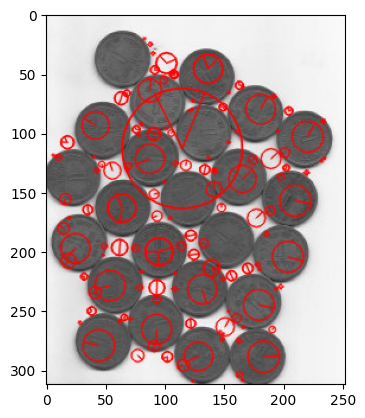

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('img/coins.jpg', cv.IMREAD_GRAYSCALE)

sift = cv.SIFT_create()

kp, des = sift.detectAndCompute(img, None)

img2 = cv.drawKeypoints(img, kp, None, (255, 0, 0), 4)
plt.imshow(img2)
plt.show()


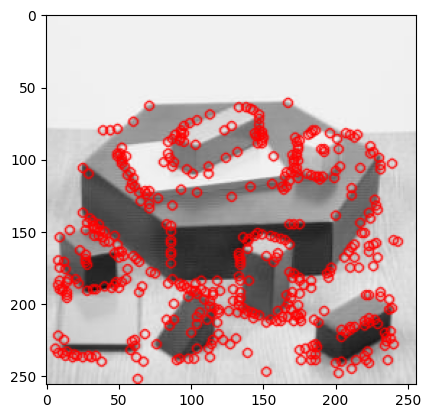

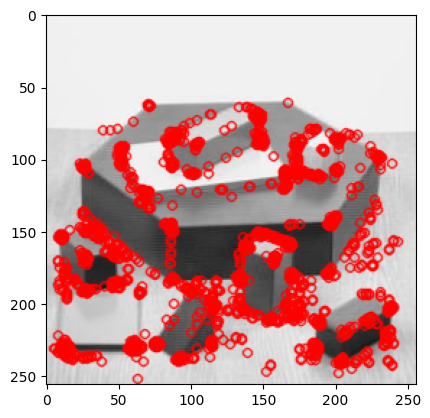

In [3]:
#https://docs.opencv.org/3.4/df/d0c/tutorial_py_fast.html
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('img/blox.jpg', cv.IMREAD_GRAYSCALE)

fast = cv.FastFeatureDetector_create()
kp = fast.detect(img, None)
img2 = cv.drawKeypoints(img, kp, None, color=(255, 0, 0))
plt.imshow(img2)
plt.show()

fast.setNonmaxSuppression(0)
kp = fast.detect(img, None)
img3 = cv.drawKeypoints(img, kp, None, color=(255, 0, 0))
plt.imshow(img3)
plt.show()


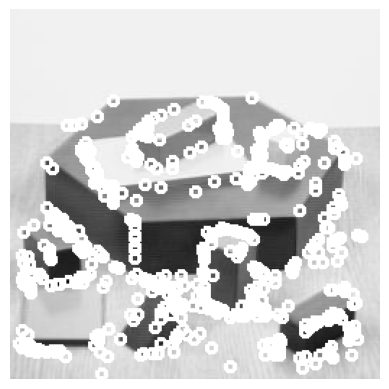

In [12]:
# https://docs.opencv.org/3.4/dc/d7d/tutorial_py_brief.html
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def brief_descriptor(image, keypoints, patch_size=31, pairs=256):
    descriptors = []
    for kp in keypoints:
        x, y = int(kp.pt[0]), int(kp.pt[1])
        patch = image[y - patch_size // 2:y + patch_size // 2 + 1,
                      x - patch_size // 2:x + patch_size // 2 + 1]
        if patch.shape != (patch_size, patch_size):
            continue
        patch = cv.GaussianBlur(patch, (5, 5), 0)
        desc = []
        for _ in range(pairs):
            p1 = np.random.randint(0, patch_size, 2)
            p2 = np.random.randint(0, patch_size, 2)
            desc.append(1 if patch[p1[0], p1[1]] < patch[p2[0], p2[1]] else 0)
        descriptors.append(desc)
    return np.array(descriptors, dtype=np.uint8)

img = cv.imread('img/blox.jpg', cv.IMREAD_GRAYSCALE)

fast = cv.FastFeatureDetector_create()
keypoints = fast.detect(img, None)
descriptors = brief_descriptor(img, keypoints)

img_with_circles = img.copy()
for kp in keypoints:
    x, y = int(kp.pt[0]), int(kp.pt[1])
    radius = int(kp.size / 2)
    cv.circle(img_with_circles, (x, y), radius, (255, 0, 0), 2)

plt.imshow(img_with_circles, cmap='gray')
plt.axis('off')
plt.show()



# Лаба 11

(290, 32)
Descriptor size: 32 bytes (default for BRIEF)
Descriptor shape: (290, 32)


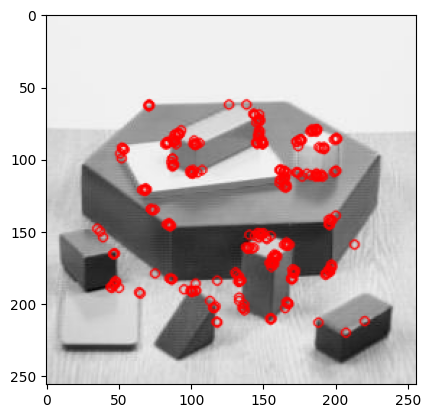

In [9]:
#https://docs.opencv.org/3.4/d1/d89/tutorial_py_orb.html
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('img/blox.jpg', cv.IMREAD_GRAYSCALE)

orb = cv.ORB_create()
kp, des = orb.detectAndCompute(img, None)

print(des.shape)
print(f"Descriptor size: {des.shape[1]} bytes (default for BRIEF)")
print(f"Descriptor shape: {des.shape}")
img_with_keypoints = cv.drawKeypoints(img, kp, None, color=(255, 0, 0))
plt.imshow(img_with_keypoints)
plt.show()


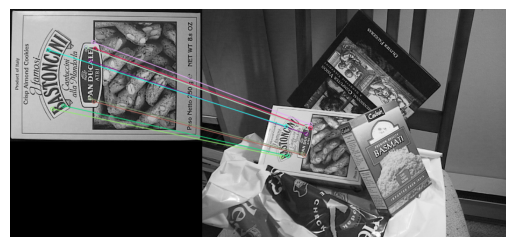

In [13]:
#https://docs.opencv.org/3.4/dc/dc3/tutorial_py_matcher.html
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('img/box.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('img/box_in_scene.png', cv.IMREAD_GRAYSCALE)

orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.axis('off')
plt.show()


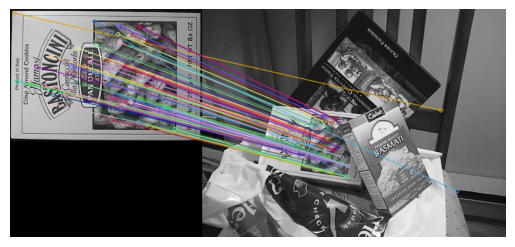

In [14]:
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('img/box.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('img/box_in_scene.png', cv.IMREAD_GRAYSCALE)

sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append([m])

img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, good_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.axis('off')
plt.show()


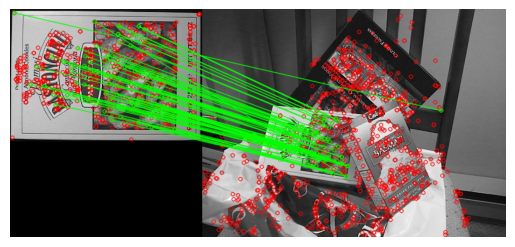

In [15]:
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('img/box.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('img/box_in_scene.png', cv.IMREAD_GRAYSCALE)

sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1, des2, k=2)

matchesMask = [[0, 0] for _ in range(len(matches))]
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0]

draw_params = dict(matchColor=(0, 255, 0),
                   singlePointColor=(255, 0, 0),
                   matchesMask=matchesMask,
                   flags=cv.DrawMatchesFlags_DEFAULT)

img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)
plt.imshow(img3)
plt.axis('off')
plt.show()


Краткое описание методов:

    Brute-Force Matching с ORB:
        Используется Hamming Distance для бинарных дескрипторов.
        Подходит для ORB, BRIEF, BRISK.

    Brute-Force Matching с SIFT:
        Используется L2 расстояние для вещественных дескрипторов.
        Применяется knnMatch и тест отношения Дэвида Лоу (Ratio Test).

    FLANN Matcher:
        Быстрее для больших наборов данных.
        Использует K-D деревья для вещественных дескрипторов (например, SIFT, SURF).
        Использует LSH для бинарных дескрипторов (например, ORB).

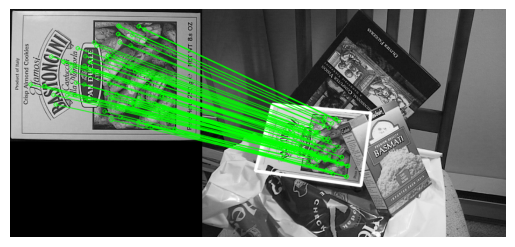

In [16]:
#https://docs.opencv.org/3.4/d1/de0/tutorial_py_feature_homography.html
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10

img1 = cv.imread('img/box.png', cv.IMREAD_GRAYSCALE)  # queryImage
img2 = cv.imread('img/box_in_scene.png', cv.IMREAD_GRAYSCALE)  # trainImage

sift = cv.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1, des2, k=2)

good = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good.append(m)

if len(good) > MIN_MATCH_COUNT:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()

    h, w = img1.shape
    pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
    dst = cv.perspectiveTransform(pts, M)

    img2 = cv.polylines(img2, [np.int32(dst)], True, 255, 3, cv.LINE_AA)
else:
    print(f"Not enough matches are found - {len(good)}/{MIN_MATCH_COUNT}")
    matchesMask = None

draw_params = dict(matchColor=(0, 255, 0),
                   singlePointColor=None,
                   matchesMask=matchesMask,
                   flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

img3 = cv.drawMatches(img1, kp1, img2, kp2, good, None, **draw_params)

plt.imshow(img3, 'gray')
plt.axis('off')
plt.show()


# Лаба 12

In [ ]:
#https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html
import cv2 as cv

def detectAndDisplay(frame):
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frame_gray = cv.equalizeHist(frame_gray)

    faces = face_cascade.detectMultiScale(frame_gray)
    for (x, y, w, h) in faces:
        center = (x + w // 2, y + h // 2)
        frame = cv.ellipse(frame, center, (w // 2, h // 2), 0, 0, 360, (255, 0, 255), 4)

        faceROI = frame_gray[y:y + h, x:x + w]
        eyes = eyes_cascade.detectMultiScale(faceROI)
        for (x2, y2, w2, h2) in eyes:
            eye_center = (x + x2 + w2 // 2, y + y2 + h2 // 2)
            radius = int(round((w2 + h2) * 0.25))
            frame = cv.circle(frame, eye_center, radius, (255, 0, 0), 4)

    cv.imshow('Capture - Face detection', frame)

face_cascade = cv.CascadeClassifier()
eyes_cascade = cv.CascadeClassifier()

face_cascade_name = 'data/haarcascade_frontalface_alt.xml'
eyes_cascade_name = 'data/haarcascade_eye_tree_eyeglasses.xml'

if not face_cascade.load(cv.samples.findFile(face_cascade_name)):
    print('--(!)Error loading face cascade')
    exit(0)
if not eyes_cascade.load(cv.samples.findFile(eyes_cascade_name)):
    print('--(!)Error loading eyes cascade')
    exit(0)

cap = cv.VideoCapture(0)
if not cap.isOpened():
    print('--(!)Error opening video capture')
    exit(0)

while True:
    ret, frame = cap.read()
    if frame is None:
        print('--(!) No captured frame -- Break!')
        break

    detectAndDisplay(frame)

    if cv.waitKey(10) & 0xFF == ord('q'):  # Нажмите 'q' для выхода
        break



: 

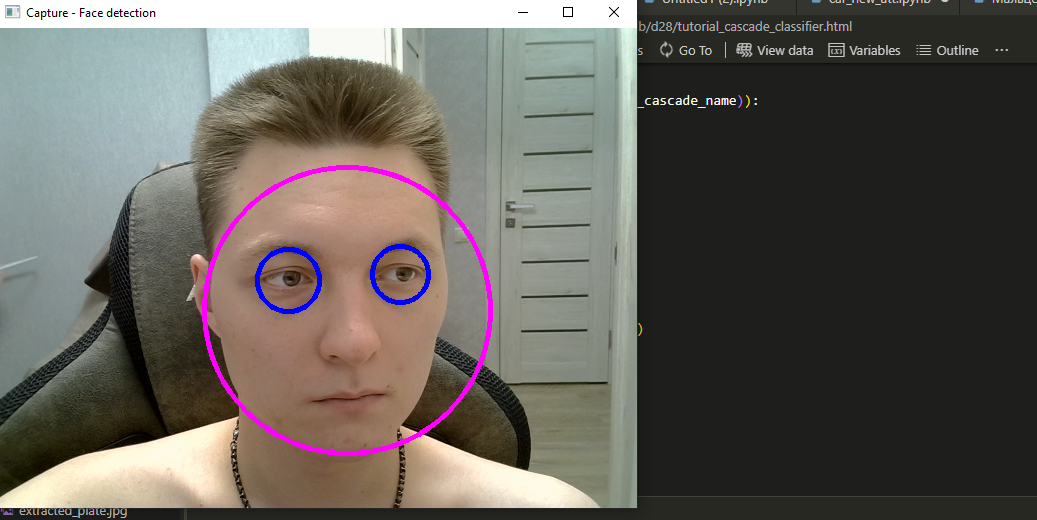

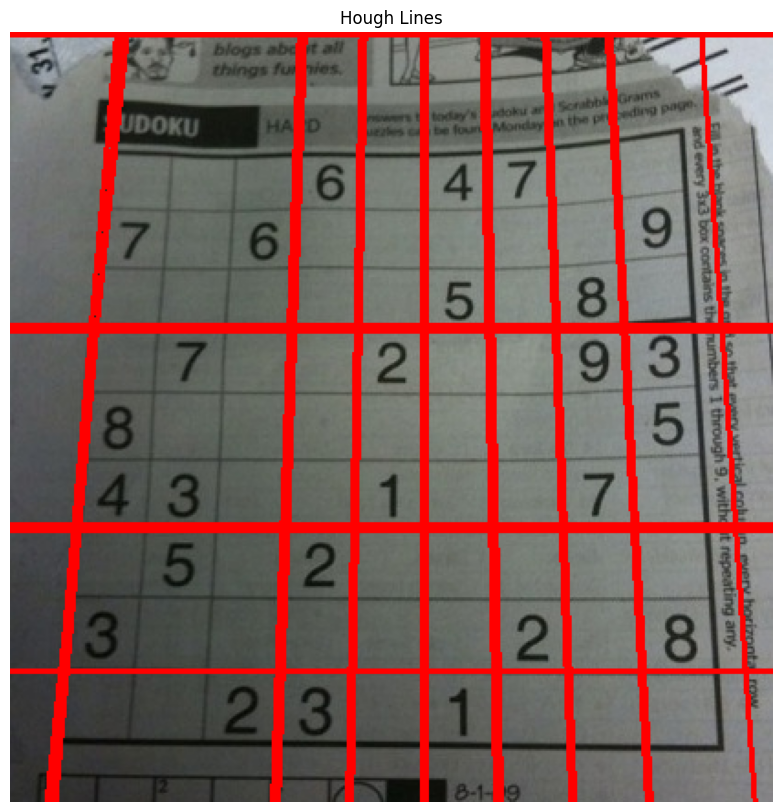

In [3]:
#https://docs.opencv.org/3.4/d6/d10/tutorial_py_houghlines.html
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('img/sudoku.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 50, 150, apertureSize=3)

lines = cv.HoughLines(edges, 1, np.pi / 180, 200)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Hough Lines")
plt.axis("off")
plt.show()


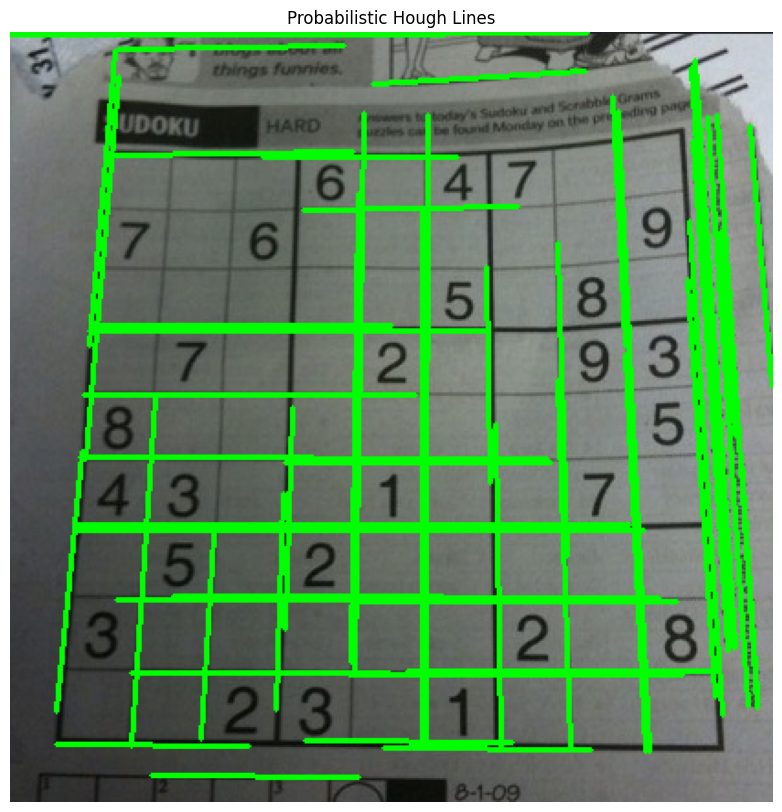

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('img/sudoku.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 50, 150, apertureSize=3)

lines = cv.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=10)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Probabilistic Hough Lines")
plt.axis("off")
plt.show()



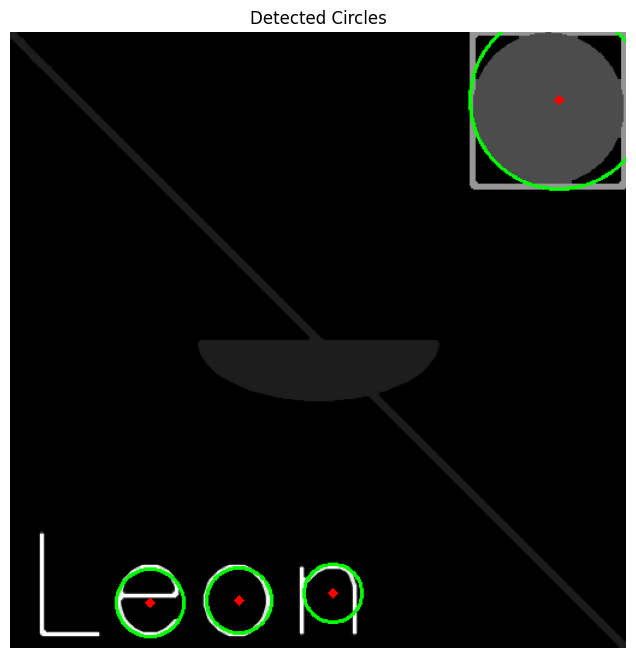

In [6]:
#https://docs.opencv.org/3.4/da/d53/tutorial_py_houghcircles.html
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('img/geometric_shapes.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "Image could not be read. Check the file path."

img = cv.medianBlur(img, 5)
cimg = cv.cvtColor(img, cv.COLOR_GRAY2BGR)

circles = cv.HoughCircles(img, cv.HOUGH_GRADIENT, 1, 20,
                          param1=50, param2=30, minRadius=0, maxRadius=0)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)  # Draw the circle
        cv.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)    # Draw the center

plt.figure(figsize=(8, 8))
plt.imshow(cv.cvtColor(cimg, cv.COLOR_BGR2RGB))
plt.title("Detected Circles")
plt.axis("off")
plt.show()
